<a href="https://colab.research.google.com/github/amsalugetasew/Deployed_Models/blob/main/GERD_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import pandas as pd

def preprocess_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)

    # Remove special symbols and emojis
    tweet = re.sub(r'[^\w\s]', '', tweet)

    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)

    # Remove @usernames
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # Remove leading and trailing whitespaces
    tweet = tweet.strip()

    return tweet

# Apply the preprocessing function to the 'tweet' column of the data frame
#df['tweet'] = df['tweet'].apply(preprocess_tweet)

#print(df)

In [27]:
import pandas as pd
data=pd.read_excel("/content/drive/MyDrive/GERD_Analysis/Total_mixed_data.xlsx")
data.head()

,Unnamed: 0,full_text,lang,Sentiment
0,0,"Egypt, which relies heavily on the Nile River ...",en,Negative
1,1,Egypt fears that the dam's construction could...,en,Negative
2,2,Egypt has been opposed to the construction of ...,en,Negative
3,3,Sudan has also expressed concerns about the GE...,en,Negative
4,4,Sudan fears that the dam could lead to increas...,en,Negative


In [28]:
# Filter out unnamed columns
unnamed_columns = data.filter(regex='Unnamed')

# Drop unnamed columns from the DataFrame
data = data.drop(columns=unnamed_columns)

# Display the DataFrame after removing unnamed columns
data.head()

,full_text,lang,Sentiment
0,"Egypt, which relies heavily on the Nile River ...",en,Negative
1,Egypt fears that the dam's construction could...,en,Negative
2,Egypt has been opposed to the construction of ...,en,Negative
3,Sudan has also expressed concerns about the GE...,en,Negative
4,Sudan fears that the dam could lead to increas...,en,Negative


In [29]:
len(data)

14066

In [30]:
data.columns

Index(['full_text', 'lang', 'Sentiment'], dtype='object')

In [31]:
data["full_text"].isnull().sum()

0

In [32]:
data["full_text"]=data["full_text"].fillna(data["full_text"].mode()[0])

In [33]:
data['full_text'] =data['full_text'].apply(preprocess_tweet)

In [34]:

data["full_text"][4000:4100]

4000    Sabi  The Nile Basin suffers from an absence o...
4001    Sabi  The GERD will benefit Egypt which will h...
4002    Sabi  The intl community should pressure Sudan...
4003    Sabi  Egypt and Sudan need to sign the agreeme...
4004    Sabi  The Grand Ethiopian Renaissance Dam GERD...
                              ...                        
4095    _AfricanUnion is mediating the talks between E...
4096    Ethiopians call on the Arab League to refrain ...
4097    For many years Egyptians have been misinformed...
4098    The Grand Ethiopian Renaissance Dam GERD will ...
4099    A research by the Uni of Waterloo UWaterloo sh...
Name: full_text, Length: 100, dtype: object

In [38]:
data["Sentiment"].unique()

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [39]:
data["Sentiment"]=data["Sentiment"].fillna("Neutral")

In [40]:
# data["Sentiment"] = data["Sentiment"].replace("Positve", "Negative")

In [45]:
# x = data[data["Sentiment"] == "Negative"]
# x
data["lang"].unique()

array(['en', 'am', 'ar', nan], dtype=object)

# **Generate wordcloud for English tweets**

# **Generate Word Cloud for Amharic Tweets**

#**Generate Word Cloud for Arabic Tweets**

In [57]:
eng_tweet=data[data["lang"]=="en"]
Amh_tweet=data[data["lang"]=="am"]
arabic_tweet=data[data["lang"]=="ar"]

In [58]:
eng_tweet
Amh_tweet
arabic_tweet
print(eng_tweet.shape, Amh_tweet.shape, arabic_tweet.shape)

(5982, 3) (4188, 3) (3894, 3)


In [54]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# from ArabicStemmer import ArabicStemmer

In [55]:
# from nltk.stem.isri import ISRIStemmer
# st = ISRIStemmer()
# w= 'حركات'
# join = w.decode('Windows-1256')
# print (st.stem(join).encode('Windows-1256').decode('utf-8'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


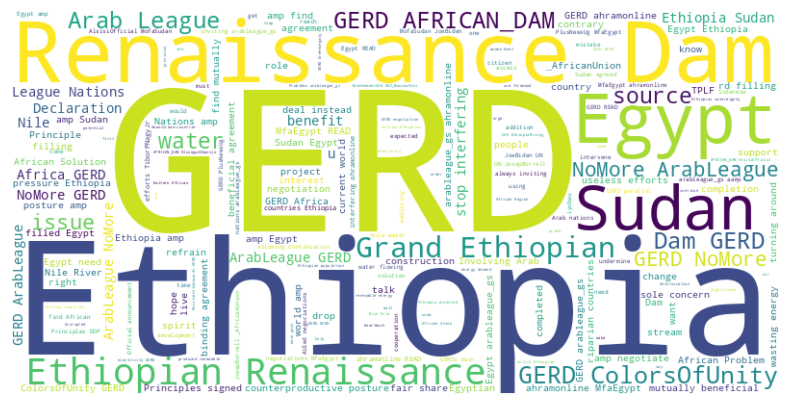

In [56]:
# Combine all tweets into a single string
text = " ".join(tweet for tweet in eng_tweet.full_text)
import nltk
nltk.download('stopwords')
# Define stop words for English
english_stop_words = set(stopwords.words('english'))

# Define stop words for Arabic
#arabic_stemmer = ArabicStemmer()
#arabic_stop_words = set(arabic_stemmer.get_stop_words())

# Generate a word cloud
#wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=english_stop_words.union(arabic_stop_words)).generate(text)
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=english_stop_words).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

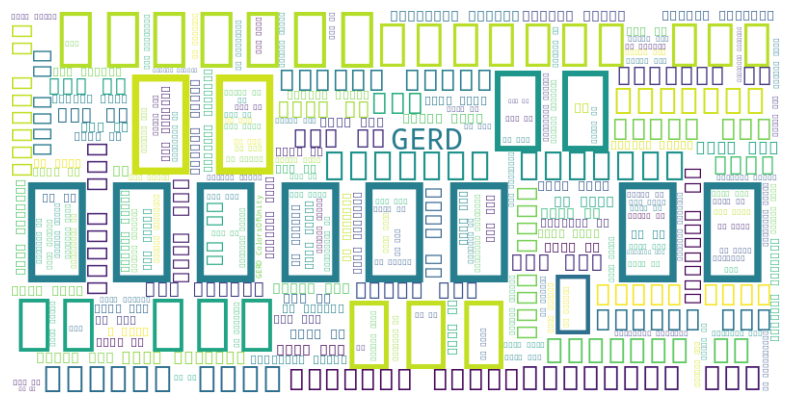

In [59]:
# Combine all tweets into a single string
text = " ".join(tweet for tweet in arabic_tweet.full_text)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Plot the word cloud
plt.figure(figsize=(14, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Sample data
df = pd.DataFrame({'tweet': ["በጣም የሚጣል የተለያዩ አገራት የሚካሄዱት ተጠቃሚዎች በተለያዩ የራስን ምልክት ራስ የሚሰጥ ማንነት ነው",
                             "የአማርኛ መጽሐፍ ስልክ መልካም የፊደል መጠቀም አይደለም"]})

# Combine all tweets into a single string
text = " ".join(tweet for tweet in Amh_tweet.full_text)

# Generate a word cloud
# wordcloud = WordCloud(width=800, height=400, font_path='/content/drive/My Drive/Myfiles/jiretsl.ttf', background_color="white").generate(text)

# Plot the word cloud
plt.figure(figsize=(15, 6))
plt.imshow(text, interpolation='bilinear')
plt.axis('off')
plt.show()

# **Build LSTM-CNN Model**

In [61]:
!pip install transformers

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, TFAutoModel
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D, concatenate
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder

In [63]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Load the tokenizer and mBERT model
model_name = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_model = TFAutoModel.from_pretrained(model_name)
bert_model.trainable = False

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [64]:
# Encode the training and testing data using the tokenizer

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
x_train = tokenizer(list(train_data["full_text"]), padding=True, truncation=True, max_length=128, return_tensors='tf')
x_test = tokenizer(list(test_data["full_text"]), padding=True, truncation=True, max_length=128, return_tensors='tf')

In [65]:
len(list(train_data["full_text"]))

11252

In [66]:
x_train[100].ids

[101,
 11065,
 10301,
 25090,
 19777,
 10109,
 12547,
 11426,
 10111,
 10531,
 10124,
 11053,
 10114,
 10435,
 10111,
 11951,
 10106,
 28336,
 10537,
 23763,
 11758,
 10347,
 28407,
 13565,
 146,
 36110,
 11758,
 10347,
 10109,
 12547,
 10377,
 10134,
 10111,
 12647,
 10124,
 10142,
 169,
 11695,
 10635,
 13028,
 10529,
 11773,
 10111,
 12286,
 10473,
 13028,
 11758,
 11760,
 10271,
 10111,
 10347,
 10109,
 12547,
 10882,
 10142,
 10105,
 16812,
 20993,
 10474,
 75633,
 10124,
 11053,
 10155,
 20442,
 32173,
 10169,
 20440,
 10345,
 11327,
 10271,
 14864,
 75633,
 10124,
 10114,
 36474,
 21092,
 10354,
 10169,
 42426,
 15217,
 10422,
 10111,
 10169,
 17446,
 15217,
 11132,
 102,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [67]:
len(tokenizer(list(test_data["full_text"])))

3

In [68]:
# Convert the labels to integer-encoded values
label_encoder = LabelEncoder()
label_encoder.fit(train_data["Sentiment"])
y_train = label_encoder.transform(train_data["Sentiment"])
y_test = label_encoder.transform(test_data["Sentiment"])

In [69]:
len(y_test)

2814

In [70]:
train_data["Sentiment"].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [71]:
len(y_train)

11252

In [72]:
unique_labels = set(y_train)
distinct_classes = list(unique_labels)

# Display the distinct classes
print(distinct_classes)

[0, 1, 2]


In [73]:
# Build the LSTM-CNN model
import tensorflow as tf
input_layer = Input(shape=(128,), dtype=tf.int32, name="input_layer")
embedding_layer = bert_model(input_layer)[0]
lstm_layer = LSTM(64, return_sequences=True)(embedding_layer)
conv_layer = Conv1D(filters=128, kernel_size=3, activation='relu')(lstm_layer)
pooling_layer = GlobalMaxPooling1D()(conv_layer)
dropout_layer = Dropout(0.5)(pooling_layer)
output_layer = Dense(len(label_encoder.classes_), activation="softmax")(dropout_layer)
model = Model(inputs=input_layer, outputs=output_layer)

In [74]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [75]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 128)]             0         
                                                                 
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPo   177853440 
 )                           olingAndCrossAttentions             
                             (last_hidden_state=(Non             
                             e, 128, 768),                       
                              pooler_output=(None, 7             
                             68),                                
                              past_key_values=None,              
                             hidden_states=None, att             
                             entions=None, cross_att             
                             entions=None)                       
                                                             

In [76]:
len(y_train)

11252

In [77]:
len(x_train)

3

In [78]:
len(x_train['input_ids'])

11252

In [ ]:
# Train the model
lstm_cnn_model = model.fit(x_train['input_ids'], y_train, batch_size=32, epochs=25, validation_split=0.2)

Epoch 1/25
 66/282 [======>.......................] - ETA: 1:19:04 - loss: 0.7108 - accuracy: 0.6667

In [ ]:
# Save the model as an HDF5 file
model.save('/content/drive/MyDrive/GERD_Analysis/Models/LSTM_CNN_Model.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
from transformers import TFBertModel
import tensorflow.keras.backend as K

# Define a custom_objects dictionary that includes the TFBertModel layer
custom_objects = {'TFBertModel': TFBertModel}

# Register the custom_objects dictionary with Keras
K.set_learning_phase(0)
model = tf.keras.models.load_model('/content/drive/My Drive/Myfiles/Models/LSTM_CNN_Model.h5', custom_objects=custom_objects)

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test['input_ids'], y_test, batch_size=32)

In [ ]:
# Make predictions on the test data
y_pred = np.argmax(model.predict(x_test['input_ids']), axis=-1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Print the classification report and confusion matrix
print("Test Data Classification Report:")
print(classification_report(y_test, y_pred))
print("Test Data Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
# Encode the input text using the tokenizer
input_text = "ركز لنا على موضوع سد النهضة وخاصة سلامة السد"
input_ids = tokenizer.encode(input_text, padding=True, truncation=True, max_length=128, return_tensors='tf')

# Make a prediction using the model
predicted_label = np.argmax(model.predict(input_ids), axis=-1)

# Convert the predicted label to its original class name
label_encoder = LabelEncoder()
label_encoder.fit(["Positive", "Negative", "Neutral"])  # Replace with the actual class names
predicted_class = label_encoder.inverse_transform(predicted_label)

# Print the predicted class
print(predicted_class)

In [ ]:
# Encode the CSV data using the tokenizer
arabic_test=pd.read_excel("/content/drive/My Drive/Myfiles/TotalArabic_Tweets_secondRound.xlsx")
x_csv = tokenizer(list(arabic_test["full text"]), padding=True, truncation=True, max_length=128, return_tensors='tf')

# Make predictions on the CSV data
csv_pred = label_encoder.inverse_transform(np.argmax(model.predict(x_csv['input_ids']), axis=-1))

# Add the predicted labels to the CSV data
arabic_test["predicted_label"] = csv_pred

# Save the CSV data with the predicted labels to a new file
arabic_test.to_csv("/content/drive/My Drive/Myfiles/csv_data_predicted.csv", index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data with the predicted labels
arabic_test_predicted = pd.read_csv("/content/drive/My Drive/Myfiles/csv_data_predicted.csv")

# Count the number of tweets with each label
label_counts = arabic_test_predicted["predicted_label"].value_counts()

# Create a pie chart to display the percentage of Positive, Negative, and Neutral tweets
labels = ['Positive', 'Negative', 'Neutral']
sizes = [label_counts[0], label_counts[1], label_counts[2]]
colors = ['green', 'red', 'gray']
explode = (0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)

# Add a title to the pie chart
plt.title('Percentage of Positive, Negative, and Neutral Tweets')

plt.axis('equal')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data with the predicted labels
#arabic_test_predicted = pd.read_csv("csv_data_predicted.csv")
arabic_test_predicted = pd.read_csv("/content/drive/My Drive/Myfiles/csv_data_predicted.csv")

# Count the number of tweets with each label
label_counts = arabic_test_predicted["predicted_label"].value_counts()

# Create a bar chart to display the percentage of Positive, Negative, and Neutral tweets
labels = ['Positive', 'Negative', 'Neutral']
sizes = [label_counts[0], label_counts[1], label_counts[2]]
colors = ['green', 'red', 'gray']

plt.bar(labels, sizes, color=colors)

# Add a title and axis labels to the bar chart
plt.title('Percentage of Positive, Negative, and Neutral Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data with the predicted labels
arabic_test_predicted = pd.read_csv("/content/drive/My Drive/Myfiles/csv_data_predicted.csv")

# Count the number of tweets with each label
label_counts = arabic_test_predicted["predicted_label"].value_counts()

# Create a bar chart to display the percentage of Positive, Negative, and Neutral tweets
labels = ['Positive', 'Negative', 'Neutral']
sizes = [label_counts[0], label_counts[1], label_counts[2]]
colors = ['green', 'red', 'gray']

plt.bar(labels, sizes, color=colors)

# Add the number of tweets at the top of each bar
for i, v in enumerate(sizes):
    plt.text(i, v, str(v), ha='center', fontweight='bold')

# Add a title and axis labels to the bar chart
plt.title('Percentage of Positive, Negative, and Neutral Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')

plt.show()

In [ ]:
# Encode the CSV data using the tokenizer
arabic_test=pd.read_excel("/content/drive/My Drive/Myfiles/Second_round__arabic_FinalTweetsAfterComment.xlsx")
x_csv = tokenizer(list(arabic_test["full_text"]), padding=True, truncation=True, max_length=128, return_tensors='tf')

# Make predictions on the CSV data
csv_pred = label_encoder.inverse_transform(np.argmax(model.predict(x_csv['input_ids']), axis=-1))

# Add the predicted labels to the CSV data
arabic_test["predicted_label"] = csv_pred

# Save the CSV data with the predicted labels to a new file
arabic_test.to_csv("/content/drive/My Drive/Myfiles/csv_data_predicted_2.csv", index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data with the predicted labels
arabic_test_predicted = pd.read_csv("/content/drive/My Drive/Myfiles/csv_data_predicted_2.csv")

# Count the number of tweets with each label
label_counts = arabic_test_predicted["predicted_label"].value_counts()

# Create a bar chart to display the percentage of Positive, Negative, and Neutral tweets
labels = ['Negative','Positive', 'Neutral']
sizes = [label_counts[0], label_counts[1], label_counts[2]]
colors = ['green', 'red', 'gray']

plt.bar(labels, sizes, color=colors)

# Add the number of tweets at the top of each bar
for i, v in enumerate(sizes):
    plt.text(i, v, str(v), ha='center', fontweight='bold')

# Add a title and axis labels to the bar chart
plt.title('Percentage of Positive, Negative, and Neutral Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')

plt.show()

In [ ]:
import pandas as pd
"Arabic_Negative_Tweets_final_round"

# Load the CSV data with the predicted labels
arabic_test_predicted = pd.read_csv("/content/drive/My Drive/Myfiles/csv_data_predicted_2.csv")

# Get the texts with the highest counts
top_texts = arabic_test_predicted["full_text"].value_counts().head(10)

# Display the texts with the highest counts
print("Top 10 frequently occurring texts:")
print(top_texts)

In [ ]:
# Display the texts with the highest counts and their counts
print("Top 10 frequently occurring texts:")
for text, count in top_texts.items():
    print(f"{text}: {count}")

In [ ]:
neg_Arab = pd.read_excel("/content/drive/My Drive/Myfiles/Arabic_Negative_Tweets_final_round.xlsx")

new_df = neg_Arab.full_text.str.split(expand=True).stack().value_counts().reset_index()

new_df.columns = ['Word', 'Frequency']

In [ ]:
new_df.to_excel("/content/drive/My Drive/Myfiles/Top_negative_Arabic_words.xlsx")

In [ ]:
neg_Arab_trans_to_En= pd.read_excel("/content/drive/My Drive/Myfiles/Top_negative_Arabic_Engl_translated_words.xlsx")
neg_Arab_trans_to_En["Word"][:60].value_counts().plot.bar("Word",14)

In [ ]:
neg_Arab_trans_to_En= pd.read_excel("/content/drive/My Drive/Myfiles/GERD Tweets SecondRound.xlsx")
neg_en=neg_Arab_trans_to_En[neg_Arab_trans_to_En["lang"]=="en"]
neg_en

In [ ]:
neg_en = neg_en.rename(columns={"full text": "full_text"})
neg_en

In [ ]:
neg_en1=neg_en[neg_en["Sentiment"]=="Negative"]
neg_en1.head()

In [ ]:
neg_en1.full_text.str.split(expand=True)

In [ ]:
neg_en1.full_text.str.split(expand=True).stack().value_counts()

In [ ]:
mport pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
#from ArabicStemmer import ArabicStemmer



# Combine all tweets into a single string
text = " ".join(tweet for tweet in neg_en1.full_text)
import nltk
nltk.download('stopwords')
# Define stop words for English
english_stop_words = set(stopwords.words('english'))

# Define stop words for Arabic
#arabic_stemmer = ArabicStemmer()
#arabic_stop_words = set(arabic_stemmer.get_stop_words())

# Generate a word cloud
#wordcloud = WordCloud(width=1000, height=600, background_color="white", stopwords=english_stop_words.union(arabic_stop_words)).generate(text)
wordcloud = WordCloud(width=1400, height=800, background_color="white", stopwords=english_stop_words).generate(text)

# Plot the word cloud
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
amh_twt= pd.read_excel("/content/drive/My Drive/Myfiles/Total_mixed_data.xlsx")
amh_twt=amh_twt[amh_twt["lang"]=="am"]

In [ ]:
amh_pos_twt=amh_twt[amh_twt["Sentiment"]=="Positive"]
amh_pos_twt.head()

In [ ]:
amh_pos_twt.full_text.str.split(expand=True).stack().value_counts()

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
#from ArabicStemmer import ArabicStemmer



# Combine all tweets into a single string
text = " ".join(tweet for tweet in amh_pos_twt.full_text)
import nltk
nltk.download('stopwords')
# Define stop words for English
english_stop_words = set(stopwords.words('english'))

# Define stop words for Arabic
#arabic_stemmer = ArabicStemmer()
#arabic_stop_words = set(arabic_stemmer.get_stop_words())

# Generate a word cloud
#wordcloud = WordCloud(width=1000, height=600, background_color="white", stopwords=english_stop_words.union(arabic_stop_words)).generate(text)
wordcloud = WordCloud(width=1400, height=800, background_color="white", stopwords=english_stop_words).generate(text)

# Plot the word cloud
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
new_df_ar_en = neg_en1.full_text.str.split(expand=True).stack().value_counts().reset_index()

new_df_ar_en = ['Word', 'Frequency']
new_df_ar_en.head()

In [ ]:
new_df.head(50)

In [ ]:
arabic_test_predicted = pd.read_csv("/content/drive/My Drive/Myfiles/csv_data_predicted_2.csv")

new_df = arabic_test_predicted.full_text.str.split(expand=True).stack().value_counts().reset_index()

new_df.columns = ['Word', 'Frequency']
new_df.head(20)

In [ ]:
df2 = arabic_test_predicted["full_text"]
df2.head()

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
from nltk.tokenize import word_tokenize
word_tokenize(df2)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Load the CSV data with the predicted labels
arabic_test_predicted = pd.read_csv("/content/drive/My Drive/Myfiles/csv_data_predicted_2.csv")



# Create a CountVectorizer object to count the occurrences of each word
# Create a CountVectorizer object to count the occurrences of each word
vectorizer = CountVectorizer()

# Count the occurrences of each word in the texts
text_counts = vectorizer.fit_transform(arabic_test_predicted["full_text"])

# Get the frequency counts of each word
word_counts = pd.DataFrame(text_counts.sum(axis=0), columns=vectorizer.get_feature_names()).transpose()
word_counts.columns = ["Frequency"]

# Display the frequency of each word
print("Word frequency counts:")
print(word_counts)

In [ ]:
filtered_text_list = [val for val in text if val not in stop_words]
filtered_text = ' '.join(filtered_text_list)
filtered_text_list[:10]